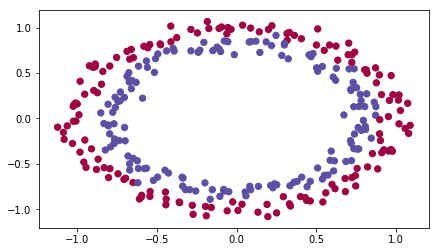

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

In [36]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):

    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        cost = compute_loss(a3, Y)

        grads = backward_propagation(X, Y, cache)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 3000 == 0:
            print("循环{}次后的成本值: {}".format(i, cost))
            costs.append(cost)
            
    # 画出成本曲线
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [37]:
# 参数初始化为零 
def initialize_parameters_zeros(layers_dims):
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### END CODE HERE ###
    return parameters

#参数w初始化为random
def initialize_parameters_random(layers_dims):
    
    np.random.seed(3)              
    parameters = {}
    L = len(layers_dims)           
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
    return parameters

# initialize_parameters_he
def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 
    
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

循环0次后的成本值: 0.6931471805599453
循环3000次后的成本值: 0.6931471805599453
循环6000次后的成本值: 0.6931471805599453
循环9000次后的成本值: 0.6931471805599453
循环12000次后的成本值: 0.6931471805599453


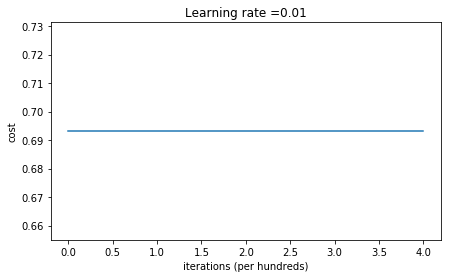

D:\Users\Administrator\PycharmProjects\Anaconda\Deep-Learning\neural_network_Python\Neural-Network-Improve\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
D:\Users\Administrator\PycharmProjects\Anaconda\Deep-Learning\neural_network_Python\Neural-Network-Improve\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


循环0次后的成本值: inf
循环3000次后的成本值: 0.5638417572298645
循环6000次后的成本值: 0.5374513807000807
循环9000次后的成本值: 0.3934764028765484
循环12000次后的成本值: 0.3861547485712325


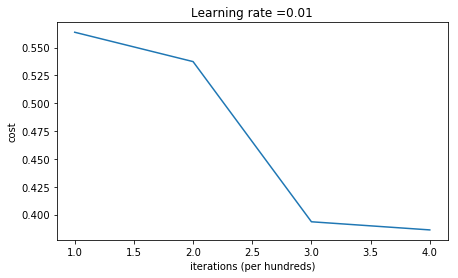

循环0次后的成本值: 0.8830537463419761
循环3000次后的成本值: 0.6526117768893807
循环6000次后的成本值: 0.4138645817071793
循环9000次后的成本值: 0.18597287209206828
循环12000次后的成本值: 0.09917746546525937


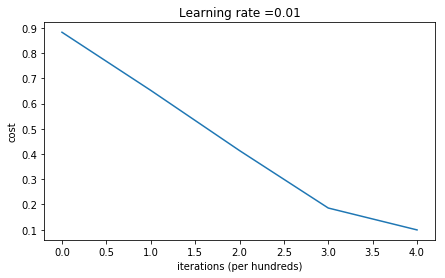

In [38]:
parameters_init_zeros = model(train_X, train_Y, initialization = "zeros")
parameters_init_random = model(train_X, train_Y, initialization = "random")
parameters_init_he = model(train_X, train_Y, initialization = "he")

In [39]:
def initialization_predict(parameters):
    print ("On the train set:")
    predictions_train = predict(train_X, train_Y, parameters)
    print ("On the test set:")
    predictions_test = predict(test_X, test_Y, parameters)

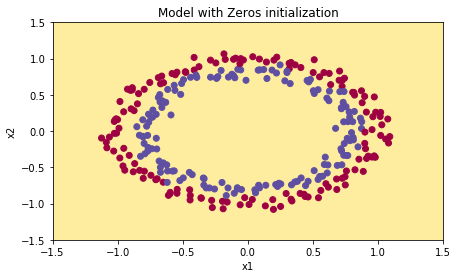

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


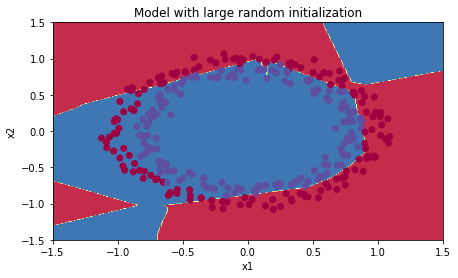

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


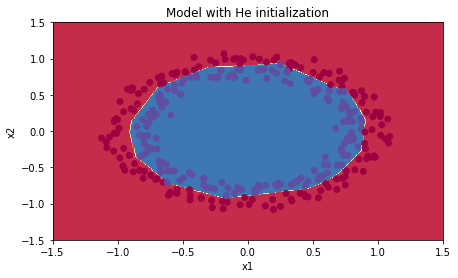

On the train set:
Accuracy: 0.993333333333
On the test set:
Accuracy: 0.96


In [40]:
# 参数初始化为0时
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters_init_zeros, x.T), train_X, train_Y)
initialization_predict(parameters_init_zeros)

# 随机初始化参数
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters_init_random, x.T), train_X, train_Y)
initialization_predict(parameters_init_random)

# Xavier初始化
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters_init_he, x.T), train_X, train_Y)
initialization_predict(parameters_init_he)